# Pendahuluan

Dalam tugas kali ini, Anda diminta untuk melakukan EDA pada [dataset "Housing Price"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) menggunakan teknik visualisasi 1D dan 2D. Dataset "Housing Price" berisi berbagai informasi mengenai properti-properti yang dijual, misalnya zona lokasi, jumlah kamar tidur, ukuran tanah, dll.

# Data Preparation

In [60]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [61]:
# Import data -- Silakan di-import berdasarkan direktori masing-masing
house = pd.read_csv("train_house.csv", usecols=['Utilities', 'HouseStyle', 'ExterQual', 'SalePrice', 'GrLivArea', 'PoolArea', 'GarageArea'])
house

,Utilities,HouseStyle,ExterQual,GrLivArea,GarageArea,PoolArea,SalePrice
0,AllPub,2Story,Gd,1710,548,0,208500
1,AllPub,1Story,TA,1262,460,0,181500
2,AllPub,2Story,Gd,1786,608,0,223500
3,AllPub,2Story,TA,1717,642,0,140000
4,AllPub,2Story,Gd,2198,836,0,250000
...,...,...,...,...,...,...,...
1455,AllPub,2Story,TA,1647,460,0,175000
1456,AllPub,1Story,TA,2073,500,0,210000
1457,AllPub,2Story,Ex,2340,252,0,266500
1458,AllPub,1Story,TA,1078,240,0,142125


In [62]:
# Drop variabel NaN
house_clean = house.dropna()
print(house_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Utilities   1460 non-null   object
 1   HouseStyle  1460 non-null   object
 2   ExterQual   1460 non-null   object
 3   GrLivArea   1460 non-null   int64 
 4   GarageArea  1460 non-null   int64 
 5   PoolArea    1460 non-null   int64 
 6   SalePrice   1460 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 80.0+ KB
None


In [63]:
# Memisahkan data menjadi numerikal & kategorikal
numerical_data = house_clean.select_dtypes(include=[np.number])
categorical_data = house_clean.select_dtypes(exclude=[np.number])


In [64]:
print("Data Numerikal:")
print(numerical_data.head())

Data Numerikal:
   GrLivArea  GarageArea  PoolArea  SalePrice
0       1710         548         0     208500
1       1262         460         0     181500
2       1786         608         0     223500
3       1717         642         0     140000
4       2198         836         0     250000


In [65]:
print("\nData Kategorikal:")
print(categorical_data.head())


Data Kategorikal:
  Utilities HouseStyle ExterQual
0    AllPub     2Story        Gd
1    AllPub     1Story        TA
2    AllPub     2Story        Gd
3    AllPub     2Story        TA
4    AllPub     2Story        Gd


# 1D Visualization 

## Soal 1

1. Buatlah visualisasi barplot dan analisis untuk variabel kategorikal:
    * `Utilities`
    * `HouseStyle`
    * `ExterQual` 

2. Buatlah visualisasi histogram dan analisis untuk variabel numerikal:
    * `SalePrice`
    * `GrLivArea`
    * `PoolArea`

3. Terapkan pemrosesan data yang sesuai untuk masing-masing variabel dan tulis penjelasan serta analisisnya!

## Variabel Kategorikal

### Utilities

* `Utilities` berisi informasi mengenai fasilitas apa saja yang tersedia di properti tersebut
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSeWa	Electricity and Gas Only	

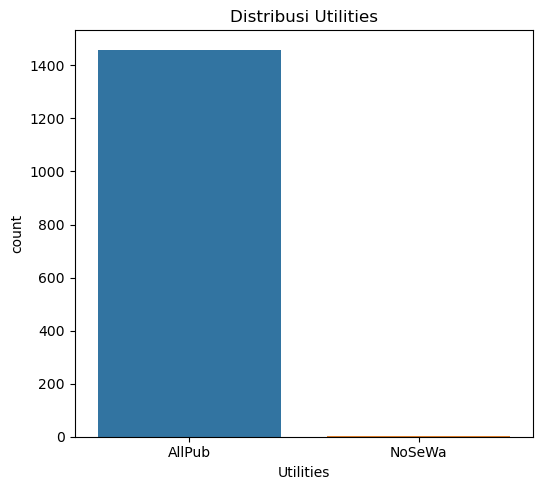

In [66]:
### Tulis kode Anda di sini
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='Utilities', data=house_clean)
plt.title('Distribusi Utilities')

plt.tight_layout()
plt.show()

### HouseStyle

HouseStyle: Style properti (misal: 1 lantai, 2 lantai, dst)
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

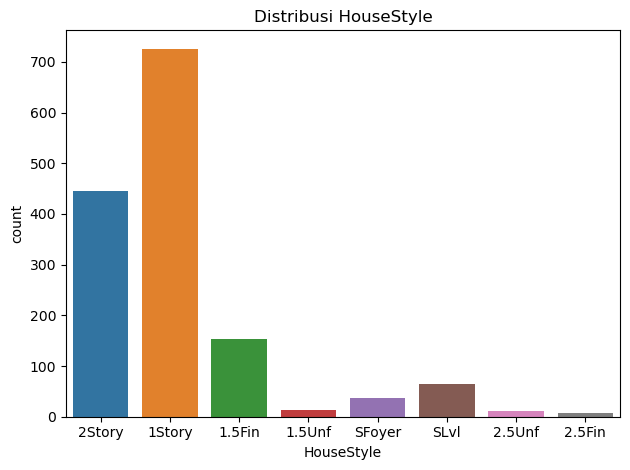

In [67]:
### Tulis kode Anda di sini
plt.subplot(1, 1, 1)
sns.countplot(x='HouseStyle', data=house_clean)
plt.title('Distribusi HouseStyle')

plt.tight_layout()
plt.show()

### ExterQual

ExterQual: Kualitas material eksterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair

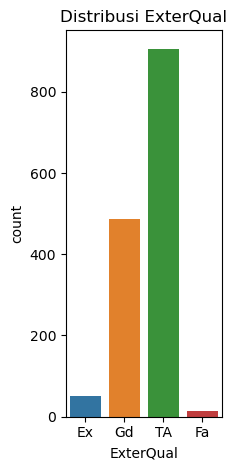

In [68]:
### Tulis kode Anda di sini
plt.subplot(1, 3, 3)
sns.countplot(x='ExterQual', data=house_clean, order=['Ex', 'Gd', 'TA', 'Fa'])
plt.title('Distribusi ExterQual')

plt.tight_layout()
plt.show()

## Variabel Numerikal

### SalePrice

* SalePrice merupakan variabel target yang ingin diprediksi
* Secara fisik, ini berarti harga properti yang dijual

In [69]:
### Tulis kode Anda di sini
median_sale_price = house_clean['SalePrice'].median()
mean_sale_price = house_clean['SalePrice'].mean()
std_dev_sale_price = house_clean['SalePrice'].std()

print("Median SalePrice:", median_sale_price)
print("Mean SalePrice:", mean_sale_price)
print("Standard Deviation of SalePrice:", std_dev_sale_price)


Median SalePrice: 163000.0
Mean SalePrice: 180921.19589041095
Standard Deviation of SalePrice: 79442.50288288663


#### **Analisis tentang variabel `SalePrice`**

Dari hasil tersebut dapat dilihat bahwa :
- Median dari SalePrice adalah $163,000. Ini berarti setengah dari total data memiliki harga penjualan yang lebih rendah dari $163,000 dan setengahnya lagi memiliki harga penjualan yang lebih tinggi.
- Mean dari SalePrice adalah sekitar $180,921.20. Ini adalah rata-rata dari semua harga penjualan properti dalam dataset.
- Standar deviasi dari SalePrice adalah sekitar $79,442.50. Ini mengukur sebaran atau dispersi dari harga penjualan properti dari rata-rata. Semakin tinggi nilai standar deviasi, semakin besar variabilitas dalam harga penjualan.

Pertanyaan :
Bagaimana korelasi antara SalePrice dengan fitur-fitur lain dalam dataset seperti GrLivArea, GarageArea, TotalBsmtSF, dll.? Apakah ada fitur-fitur tertentu yang memiliki korelasi yang kuat atau lemah dengan SalePrice?

### GrLivArea

* GrLivArea berisi informasi mengenai luas area tinggal di atas permukaan tanah (tidak termasuk basement)
* Satuan yang digunakan adalah *square feet*

In [70]:
### Tulis kode Anda di sini
median_grlivarea = house_clean['GrLivArea'].median()
mean_grlivarea = house_clean['GrLivArea'].mean()
std_dev_grlivarea = house_clean['GrLivArea'].std()

print("Median GrLivArea:", median_grlivarea)
print("Mean GrLivArea:", mean_grlivarea)
print("Standard Deviation of GrLivArea:", std_dev_grlivarea)

Median GrLivArea: 1464.0
Mean GrLivArea: 1515.463698630137
Standard Deviation of GrLivArea: 525.4803834232027


#### **Analisis tentang variabel `GrlivArea`**

- Median dari GrLivArea adalah 1464 square feet. Ini berarti setengah dari total data memiliki luas area tinggal di atas permukaan tanah yang kurang dari atau sama dengan 1464 square feet.
- Mean dari GrLivArea adalah sekitar 1515.46 square feet. Ini adalah rata-rata dari semua luas area tinggal di atas permukaan tanah dalam dataset.
- Standar deviasi dari GrLivArea adalah sekitar 525.48 square feet. Ini mengukur sebaran atau dispersi dari luas area tinggal di atas permukaan tanah dari rata-rata. Semakin tinggi nilai standar deviasi, semakin besar variabilitas dalam luas area tinggal di atas permukaan tanah.

Pertanyaan :
Apakah ada hubungan antara luas area tinggal di atas permukaan tanah (GrLivArea) dengan harga penjualan (SalePrice)? 
Apakah properti dengan luas area tinggal yang lebih besar cenderung memiliki harga jual yang lebih tinggi?

### GarageArea

* GarageArea berisi informasi mengenai luas garasi (jika ada)
* Satuan yang digunakan adalah *square feet*

In [71]:
### Tulis kode Anda di sini
median_garage_area = house_clean['GarageArea'].median()
mean_garage_area = house_clean['GarageArea'].mean()
std_dev_garage_area = house_clean['GarageArea'].std()

print("Median GarageArea:", median_garage_area)
print("Mean GarageArea:", mean_garage_area)
print("Standard Deviation of GarageArea:", std_dev_garage_area)


Median GarageArea: 480.0
Mean GarageArea: 472.9801369863014
Standard Deviation of GarageArea: 213.80484145338076


#### **Analisis tentang variabel `GarageArea`**

- Median dari GarageArea adalah 480 square feet. Ini berarti setengah dari total data memiliki luas garasi yang kurang dari atau sama dengan 480 square feet.
- Mean dari GarageArea adalah sekitar 472.98 square feet. Ini adalah rata-rata dari semua luas garasi dalam dataset.
- Standar deviasi dari GarageArea adalah sekitar 213.80 square feet. Ini mengukur sebaran atau dispersi dari luas garasi dari rata-rata. Semakin tinggi nilai standar deviasi, semakin besar variabilitas dalam luas garasi.

Pertanyaan :
Apakah ada hubungan antara luas garasi (GarageArea) dengan harga penjualan (SalePrice)?

## Pemrosesan Data Variabel Numerikal

In [72]:
# Transformasi log-10 SalePrice

house_clean['SalePrice_log'] = np.log10(house_clean['SalePrice'])
median_saleprice_log = house_clean['SalePrice_log'].median()
mean_saleprice_log = house_clean['SalePrice_log'].mean()
std_dev_saleprice_log = house_clean['SalePrice_log'].std()

print("Median SalePrice (log-10 transformed):", median_saleprice_log)
print("Mean SalePrice (log-10 transformed):", mean_saleprice_log)
print("Standard Deviation of SalePrice (log-10 transformed):", std_dev_saleprice_log)


Median SalePrice (log-10 transformed): 5.212187604403958
Mean SalePrice (log-10 transformed): 5.221978956475622
Standard Deviation of SalePrice (log-10 transformed): 0.17347974217176843


In [73]:
# Transformasi log-10 GrLivArea

house_clean['GrLivArea_log'] = np.log10(house_clean['GrLivArea'] + 1)
median_grlivarea_log = house_clean['GrLivArea_log'].median()
mean_grlivarea_log = house_clean['GrLivArea_log'].mean()
std_dev_grlivarea_log = house_clean['GrLivArea_log'].std()

print("Median GrLivArea (log-10 transformed):", median_grlivarea_log)
print("Mean GrLivArea (log-10 transformed):", mean_grlivarea_log)
print("Standard Deviation of GrLivArea (log-10 transformed):", std_dev_grlivarea_log)


Median GrLivArea (log-10 transformed): 3.1658376246901283
Mean GrLivArea (log-10 transformed): 3.1566745492712074
Standard Deviation of GrLivArea (log-10 transformed): 0.1447516577255709


In [74]:
# Menghilangkan nilai-nol pada GarageArea
house_clean = house_clean[house_clean['GarageArea'] != 0]
median_garagearea_clean = house_clean['GarageArea'].median()
mean_garagearea_clean = house_clean['GarageArea'].mean()
std_dev_garagearea_clean = house_clean['GarageArea'].std()

print("Median GarageArea (setelah menghilangkan nilai-nol):", median_garagearea_clean)
print("Mean GarageArea (setelah menghilangkan nilai-nol):", mean_garagearea_clean)
print("Standard Deviation of GarageArea (setelah menghilangkan nilai-nol):", std_dev_garagearea_clean)


Median GarageArea (setelah menghilangkan nilai-nol): 484.0
Mean GarageArea (setelah menghilangkan nilai-nol): 500.76214648295866
Standard Deviation of GarageArea (setelah menghilangkan nilai-nol): 185.68051979433156


#### **Penjelasan dan analisis tentang pemrosesan data**

- Setelah transformasi log-10, distribusi SalePrice yang simetris dan kemungkinan memiliki lebih sedikit outlier. Ini dapat membuat analisis statistik lebih stabil dan model prediksi lebih akurat, terutama jika asumsi distribusi normal diperlukan.
- Setelah transformasi log-10, distribusi GrLivArea kemungkinan akan lebih simetris dan mendekati distribusi normal. Hal ini dapat membantu dalam menyesuaikan model statistik yang mengasumsikan distribusi normal atau mempermudah interpretasi hasil analisis.
- Setelah menghapus nilai-nol, distribusi GarageArea akan lebih mencerminkan properti-properti yang sebenarnya memiliki garasi. Analisis statistik dan pemodelan yang melibatkan GarageArea setelah penghapusan nilai-nol mungkin akan lebih akurat dan informatif.

# 2D Visualization

## Soal 2

1. Buat visualisasi tentang hubungan antara:
    * `GrLivArea` dengan `SalePrice`
    * `GarageArea` dengan `SalePrice`

2. Buat hipotesis Anda tentang hubungan antar-variabel

# `GrLivArea` dengan `SalePrice`

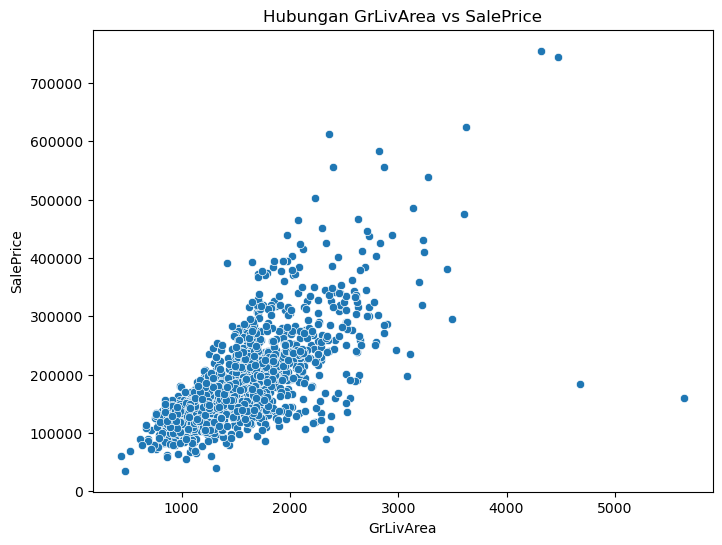

In [75]:
# Scatter plot GrLivArea vs SalePrice
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x='GrLivArea', y='SalePrice', data=house_clean)
ax.set_title('Hubungan GrLivArea vs SalePrice')
ax.set_xlabel('GrLivArea')
ax.set_ylabel('SalePrice')
plt.show()

# `GarageArea` dengan `SalePrice`

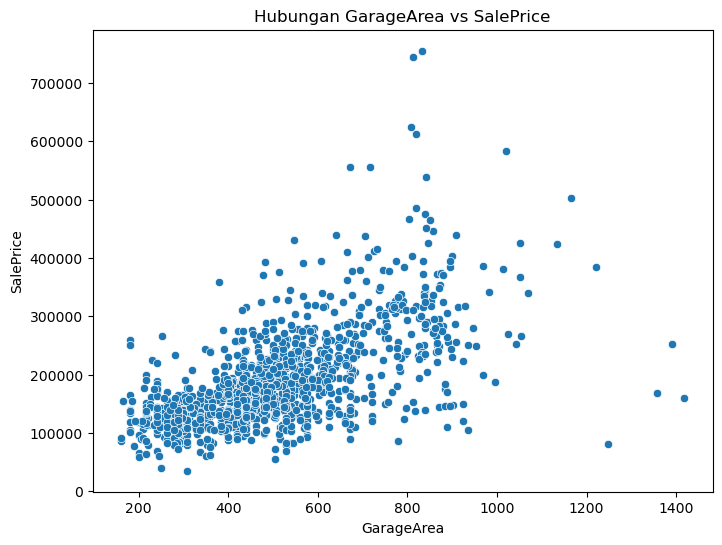

In [76]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x='GarageArea', y='SalePrice', data=house_clean)
ax.set_title('Hubungan GarageArea vs SalePrice')
ax.set_xlabel('GarageArea')
ax.set_ylabel('SalePrice')
plt.show()

#### **Hipotesis tentang hubungan antar-variabel**

Analisis:
Hubungan antara GrLivArea dan SalePrice:

Terdapat hubungan yang positif antara GrLivArea (Area Hidup di atas Tanah) dan SalePrice (Harga Penjualan). Ini berarti semakin besar GrLivArea, semakin tinggi juga SalePrice. Hal ini masuk akal, karena umumnya properti dengan area hidup yang lebih besar cenderung memiliki harga jual yang lebih tinggi.
Hubungan antara GarageArea dan SalePrice:

Juga terlihat hubungan positif antara GarageArea (Area Garasi) dan SalePrice (Harga Penjualan). Artinya, semakin besar GarageArea, semakin tinggi juga SalePrice. Ini juga masuk akal, karena garasi yang lebih besar atau memiliki kapasitas untuk lebih banyak mobil dapat meningkatkan nilai properti.